<a href="https://colab.research.google.com/github/supanut-suntikoon/MunRiverResearch/blob/main/MunRiverResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Analysis: Mineral Weathering Rate vs Biomass Degradation Rate

In [20]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace the URL with the actual raw file URL from your GitHub repo
url = 'https://raw.githubusercontent.com/supanut-suntikoon/MunRiverResearch/main/MinW_BioDeg.csv'

# Load your data directly from GitHub
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
# print(data.head())
data

,StationID,dry season mineral weathering,dry season biomass degradation,wet season mineral weathering,wet season biomass degradation
0,M01,15.17,27.35,79.3,100
1,M02,15.34,12.65,135.4,98
2,M03,10.33,10.02,895.2,885.3
3,M04,0.15,100,370.2,316.4
4,M05,10.48,10.02,1671.4,6286.5
5,M06,1.37,10.08,154.4,115.1
6,M07,1.67,10,163.7,100
7,M08,85.34,118.99,410.44,603.06
8,M09,183.2,255.42,881.06,1294.54
9,M10,0.63,9.92,270.6,108.7


ANOVA results for Mineral Weathering Rate: F-value = 13.3279, p-value = 0.0009
ANOVA results for Biomass Degradation Rate: F-value = 3.0270, p-value = 0.0915


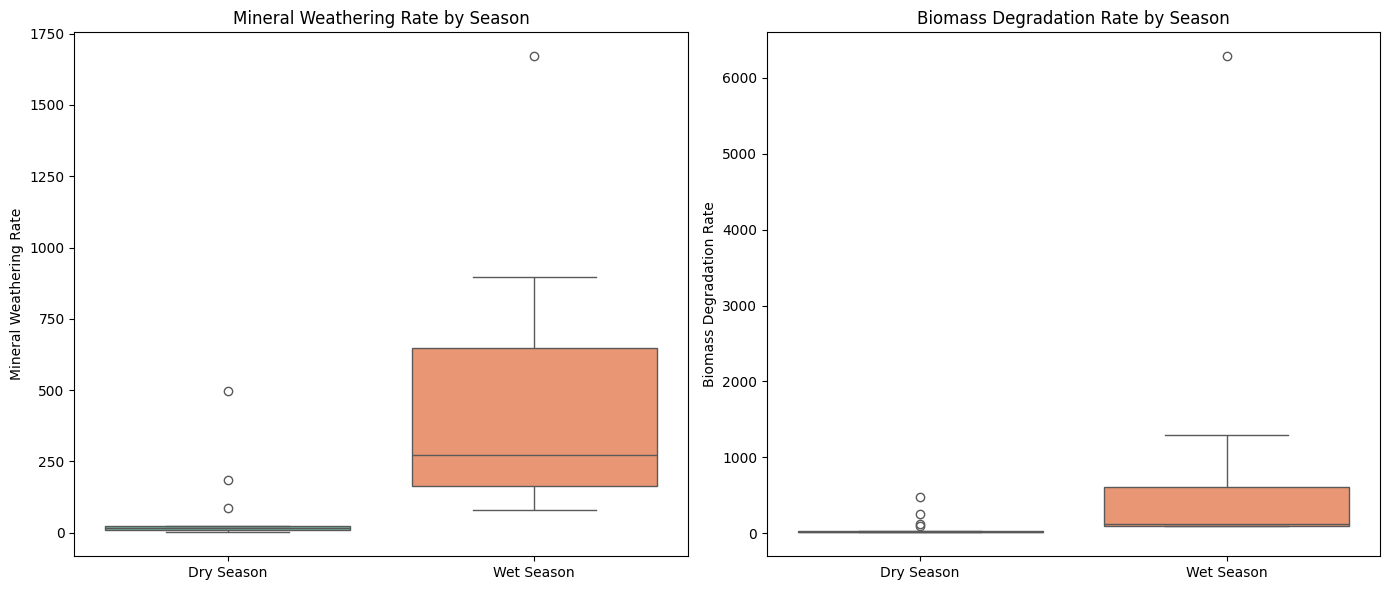

In [21]:
df = pd.DataFrame(data)

df.replace('-', np.nan, inplace=True)

# Remove the 'Total' row and rows with NaN values for ANOVA
df = df.dropna().iloc[:-1]

# Convert the relevant columns to floats
df['dry season mineral weathering'] = df['dry season mineral weathering'].astype(float)
df['dry season biomass degradation'] = df['dry season biomass degradation'].astype(float)
df['wet season mineral weathering'] = df['wet season mineral weathering'].astype(float)
df['wet season biomass degradation'] = df['wet season biomass degradation'].astype(float)

# ANOVA for Mineral Weathering Rate
f_val_mwr, p_val_mwr = stats.f_oneway(df['dry season mineral weathering'], df['wet season mineral weathering'])

# ANOVA for Biomass Degradation Rate
f_val_bdr, p_val_bdr = stats.f_oneway(df['dry season biomass degradation'], df['wet season biomass degradation'])

# Print the ANOVA results
print(f'ANOVA results for Mineral Weathering Rate: F-value = {f_val_mwr:.4f}, p-value = {p_val_mwr:.4f}')
print(f'ANOVA results for Biomass Degradation Rate: F-value = {f_val_bdr:.4f}, p-value = {p_val_bdr:.4f}')

# Visualize the distribution of the data
plt.figure(figsize=(14, 6))

# Mineral Weathering Rate
plt.subplot(1, 2, 1)
sns.boxplot(data=[df['dry season mineral weathering'], df['wet season mineral weathering']],
            palette="Set2")
plt.xticks([0, 1], ['Dry Season', 'Wet Season'])
plt.ylabel('Mineral Weathering Rate')
plt.title('Mineral Weathering Rate by Season')

# Biomass Degradation Rate
plt.subplot(1, 2, 2)
sns.boxplot(data=[df['dry season biomass degradation'], df['wet season biomass degradation']],
            palette="Set2")
plt.xticks([0, 1], ['Dry Season', 'Wet Season'])
plt.ylabel('Biomass Degradation Rate')
plt.title('Biomass Degradation Rate by Season')

plt.tight_layout()
plt.show()

In [22]:
# Calculate the min and max ranges for each category
min_dry_mwr = df['dry season mineral weathering'].min()
max_dry_mwr = df['dry season mineral weathering'].max()

min_dry_bdr = df['dry season biomass degradation'].min()
max_dry_bdr = df['dry season biomass degradation'].max()

min_wet_mwr = df['wet season mineral weathering'].min()
max_wet_mwr = df['wet season mineral weathering'].max()

min_wet_bdr = df['wet season biomass degradation'].min()
max_wet_bdr = df['wet season biomass degradation'].max()

# Print the min and max ranges
print(f'Dry Season Mineral Weathering Rate: {min_dry_mwr} - {max_dry_mwr}')
print(f'Dry Season Biomass Degradation Rate: {min_dry_bdr} - {max_dry_bdr}')

print(f'Wet Season Mineral Weathering Rate: {min_wet_mwr} - {max_wet_mwr}')
print(f'Wet Season Biomass Degradation Rate: {min_wet_bdr} - {max_wet_bdr}')

Dry Season Mineral Weathering Rate: 0.15 - 497.4
Dry Season Biomass Degradation Rate: 9.92 - 483.74
Wet Season Mineral Weathering Rate: 79.3 - 1671.4
Wet Season Biomass Degradation Rate: 98.0 - 6286.5
